In [65]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [66]:
Train = np.loadtxt('numerical_classification/train.csv')
TrainLabel = np.loadtxt('numerical_classification/trainLabel.csv').astype(int)
Test = np.loadtxt('numerical_classification/test.csv')
TestLabel = np.loadtxt('numerical_classification/testLabel.csv').astype(int)
print(Train.shape)
np.random.seed(0)
np.random.shuffle(Train)
np.random.seed(0)
np.random.shuffle(TrainLabel)
np.random.seed(0)
np.random.shuffle(Test)
np.random.seed(0)
np.random.shuffle(TestLabel)

(3529, 8)


In [67]:
p = int((len(Train)*0.8))

Train_p = Train[:p]
Val = Train[p:]

TrainLabel_p = TrainLabel[:p]
ValLabel = TrainLabel[p:]

print(len(Train_p), " ", len(Val))

2823   706


In [68]:
class PatientDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.from_numpy(features).float()
        self.labels = torch.from_numpy(labels).long()
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        feature_vec = self.features[idx]
        label = self.labels[idx]
        return feature_vec, label

In [69]:
Train_dataloader = DataLoader(PatientDataset(Train_p, TrainLabel_p), batch_size=64)
Val_dataloader = DataLoader(PatientDataset(Val, ValLabel), batch_size=64)
Test_dataloader = DataLoader(PatientDataset(Test, TestLabel), batch_size=64)

In [70]:
Train_dataloader.dataset.labels[1]

tensor(0)

In [71]:
Train_dataloader.dataset.features.size()

torch.Size([2823, 8])

In [72]:
Train_dataloader.dataset.labels.size()

torch.Size([2823])

In [ ]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 8.
      nn.Linear(12, 64) 
       nn.Linear(64, 64)
        nn.Linear(64, 1) 
        
        nn.ReLU()
        nn.Dropout(p=0.1)
       nn.BatchNorm1d(64)
      = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x


In [244]:
class PNeuralNetwork(nn.Module):
    def __init__(self):
        super(PNeuralNetwork,self).__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
            nn.Linear(8, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid(),
           
        
        )
    
    def forward(self, x):
        x = self.flatten(x)
        prediction = self.model(x)
        return prediction

In [245]:
Model = PNeuralNetwork()
print(Model)

PNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (model): Sequential(
    (0): Linear(in_features=8, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [246]:
def pTraining(dataloader, model, loss_fn, optimizer):
    full_loss = 0
    correct = 0
    
    for (X, y) in dataloader:
        
        pred = model(X)
        yf = y.type(torch.FloatTensor)
        loss = loss_fn(pred, yf.unsqueeze(1)) # [32] -> [32, 1]
        full_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        correct += (torch.flatten((pred > 0).long()) == y).type(torch.float).sum().item()
    
    full_loss /= len(dataloader)
    correct /= len(dataloader.dataset)
    print("Training Loss ", full_loss)
    print("Training Accuracy ", correct)
    return full_loss, correct

In [247]:
def pTesting(dataloader, model, loss_fn):
    test_loss = 0
    correct = 0
    predLabels = []
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            yf = y.type(torch.FloatTensor)
            test_loss += loss_fn(pred, yf.unsqueeze(1)).item()
            correct += (torch.flatten((pred > 0).long()) == y).type(torch.float).sum().item()
            predLabels.append(torch.flatten((pred > 0).long()).tolist())
    
    test_loss /= len(dataloader)
    correct /= len(dataloader.dataset)
    print("Testing loss ", test_loss)
    print("Testing Accuracy ", correct)
    predLabels = list(np.concatenate(predLabels).flat)
    return test_loss, correct, predLabels

In [248]:
Model = PNeuralNetwork()
Loss_fn = nn.BCELoss() #nn.BCELoss
Optimizer = torch.optim.Adam(Model.parameters())

TrainingAcc = []
TrainingLoss = []
ValidationAcc = []
ValidationLoss = []

for e in range(1000):
    print("Epoch ", e+1, "\n-----------------------------------")
    TLoss, TAcc = pTraining(Train_dataloader, Model, Loss_fn, Optimizer)
    TrainingAcc.append(TAcc)
    TrainingLoss.append(TLoss)
    VLoss, VAcc, x = pTesting(Val_dataloader, Model, Loss_fn)
    ValidationAcc.append(VAcc)
    ValidationLoss.append(VLoss)
    print()
x, y, PredLabel = pTesting(Test_dataloader, Model, Loss_fn)

Epoch  1 
-----------------------------------
Training Loss  0.6778733147664017
Training Accuracy  0.5990081473609635
Testing loss  0.661435401957968
Testing Accuracy  0.5821529745042493

Epoch  2 
-----------------------------------
Training Loss  0.6506485450133849
Training Accuracy  0.5990081473609635
Testing loss  0.6320249749266583
Testing Accuracy  0.5821529745042493

Epoch  3 
-----------------------------------
Training Loss  0.6236627584093073
Training Accuracy  0.5990081473609635
Testing loss  0.6045269681059796
Testing Accuracy  0.5821529745042493

Epoch  4 
-----------------------------------
Training Loss  0.6017865562037136
Training Accuracy  0.5990081473609635
Testing loss  0.583597701528798
Testing Accuracy  0.5821529745042493

Epoch  5 
-----------------------------------
Training Loss  0.586742621459318
Training Accuracy  0.5990081473609635
Testing loss  0.5697930947594021
Testing Accuracy  0.5821529745042493

Epoch  6 
-----------------------------------
Training Los

Training Loss  0.5420218518610751
Training Accuracy  0.5990081473609635
Testing loss  0.5351406271043031
Testing Accuracy  0.5821529745042493

Epoch  48 
-----------------------------------
Training Loss  0.5417715230684602
Training Accuracy  0.5990081473609635
Testing loss  0.5351777050806128
Testing Accuracy  0.5821529745042493

Epoch  49 
-----------------------------------
Training Loss  0.5415366787588998
Training Accuracy  0.5990081473609635
Testing loss  0.535138735304708
Testing Accuracy  0.5821529745042493

Epoch  50 
-----------------------------------
Training Loss  0.5412922823027279
Training Accuracy  0.5990081473609635
Testing loss  0.5350898504257202
Testing Accuracy  0.5821529745042493

Epoch  51 
-----------------------------------
Training Loss  0.5410782256153193
Training Accuracy  0.5990081473609635
Testing loss  0.5349904855956202
Testing Accuracy  0.5821529745042493

Epoch  52 
-----------------------------------
Training Loss  0.5408873973267802
Training Accuracy

Testing loss  0.5341038263362387
Testing Accuracy  0.5821529745042493

Epoch  94 
-----------------------------------
Training Loss  0.5348326182097531
Training Accuracy  0.5990081473609635
Testing loss  0.5341275269570558
Testing Accuracy  0.5821529745042493

Epoch  95 
-----------------------------------
Training Loss  0.5347440410196111
Training Accuracy  0.5990081473609635
Testing loss  0.5342998789704364
Testing Accuracy  0.5821529745042493

Epoch  96 
-----------------------------------
Training Loss  0.5346447021773691
Training Accuracy  0.5990081473609635
Testing loss  0.53436697177265
Testing Accuracy  0.5821529745042493

Epoch  97 
-----------------------------------
Training Loss  0.5345430631985825
Training Accuracy  0.5990081473609635
Testing loss  0.5344270053117172
Testing Accuracy  0.5821529745042493

Epoch  98 
-----------------------------------
Training Loss  0.5344582816188255
Training Accuracy  0.5990081473609635
Testing loss  0.5344864285510519
Testing Accuracy  0

Testing loss  0.5359073579311371
Testing Accuracy  0.5821529745042493

Epoch  140 
-----------------------------------
Training Loss  0.5324600228432859
Training Accuracy  0.5990081473609635
Testing loss  0.5359413546064625
Testing Accuracy  0.5821529745042493

Epoch  141 
-----------------------------------
Training Loss  0.532418225253566
Training Accuracy  0.5990081473609635
Testing loss  0.5359789016454116
Testing Accuracy  0.5821529745042493

Epoch  142 
-----------------------------------
Training Loss  0.5323731989673014
Training Accuracy  0.5990081473609635
Testing loss  0.536036482323771
Testing Accuracy  0.5821529745042493

Epoch  143 
-----------------------------------
Training Loss  0.5323365401016192
Training Accuracy  0.5990081473609635
Testing loss  0.5361264762671097
Testing Accuracy  0.5821529745042493

Epoch  144 
-----------------------------------
Training Loss  0.5322921687967321
Training Accuracy  0.5990081473609635
Testing loss  0.5361623647420303
Testing Accura

Testing loss  0.5390386710996213
Testing Accuracy  0.5821529745042493

Epoch  185 
-----------------------------------
Training Loss  0.529602761014124
Training Accuracy  0.5990081473609635
Testing loss  0.5390666541845902
Testing Accuracy  0.5821529745042493

Epoch  186 
-----------------------------------
Training Loss  0.5295583203937231
Training Accuracy  0.5990081473609635
Testing loss  0.539156683113264
Testing Accuracy  0.5821529745042493

Epoch  187 
-----------------------------------
Training Loss  0.5295214435357726
Training Accuracy  0.5990081473609635
Testing loss  0.5391691987929137
Testing Accuracy  0.5821529745042493

Epoch  188 
-----------------------------------
Training Loss  0.5294902405042327
Training Accuracy  0.5990081473609635
Testing loss  0.5392683705557948
Testing Accuracy  0.5821529745042493

Epoch  189 
-----------------------------------
Training Loss  0.5294474828779028
Training Accuracy  0.5990081473609635
Testing loss  0.53929338377455
Testing Accuracy

Testing loss  0.5413979382618613
Testing Accuracy  0.5821529745042493

Epoch  229 
-----------------------------------
Training Loss  0.5284939863708582
Training Accuracy  0.5990081473609635
Testing loss  0.5414619601291158
Testing Accuracy  0.5821529745042493

Epoch  230 
-----------------------------------
Training Loss  0.5284724426403474
Training Accuracy  0.5990081473609635
Testing loss  0.5414925023265507
Testing Accuracy  0.5821529745042493

Epoch  231 
-----------------------------------
Training Loss  0.5284683687633343
Training Accuracy  0.5990081473609635
Testing loss  0.541557692963144
Testing Accuracy  0.5821529745042493

Epoch  232 
-----------------------------------
Training Loss  0.5284488013621127
Training Accuracy  0.5990081473609635
Testing loss  0.5416071427905041
Testing Accuracy  0.5821529745042493

Epoch  233 
-----------------------------------
Training Loss  0.5284285294205955
Training Accuracy  0.5990081473609635
Testing loss  0.5416145946668542
Testing Accur

Testing loss  0.5427623818749967
Testing Accuracy  0.5821529745042493

Epoch  275 
-----------------------------------
Training Loss  0.5280259094211492
Training Accuracy  0.5990081473609635
Testing loss  0.5427727349426436
Testing Accuracy  0.5821529745042493

Epoch  276 
-----------------------------------
Training Loss  0.5280334721790271
Training Accuracy  0.5990081473609635
Testing loss  0.5427819347899893
Testing Accuracy  0.5821529745042493

Epoch  277 
-----------------------------------
Training Loss  0.5280309771553854
Training Accuracy  0.5990081473609635
Testing loss  0.5428190399771151
Testing Accuracy  0.5821529745042493

Epoch  278 
-----------------------------------
Training Loss  0.5280135079716028
Training Accuracy  0.5990081473609635
Testing loss  0.5427541642085366
Testing Accuracy  0.5821529745042493

Epoch  279 
-----------------------------------
Training Loss  0.5280079865053798
Training Accuracy  0.5990081473609635
Testing loss  0.5427977986957716
Testing Accu

Training Loss  0.5278008519933465
Training Accuracy  0.5990081473609635
Testing loss  0.5430523869783982
Testing Accuracy  0.5821529745042493

Epoch  321 
-----------------------------------
Training Loss  0.5277955173776391
Training Accuracy  0.5990081473609635
Testing loss  0.5431008066820062
Testing Accuracy  0.5821529745042493

Epoch  322 
-----------------------------------
Training Loss  0.5277821203965819
Training Accuracy  0.5990081473609635
Testing loss  0.5430811578812806
Testing Accuracy  0.5821529745042493

Epoch  323 
-----------------------------------
Training Loss  0.5277807943606645
Training Accuracy  0.5990081473609635
Testing loss  0.5431158153907113
Testing Accuracy  0.5821529745042493

Epoch  324 
-----------------------------------
Training Loss  0.5277621190199692
Training Accuracy  0.5990081473609635
Testing loss  0.5431068345256473
Testing Accuracy  0.5821529745042493

Epoch  325 
-----------------------------------
Training Loss  0.5277672785051754
Training Ac

Training Loss  0.5275889993383643
Training Accuracy  0.5990081473609635
Testing loss  0.543373659900997
Testing Accuracy  0.5821529745042493

Epoch  365 
-----------------------------------
Training Loss  0.5275649535522032
Training Accuracy  0.5990081473609635
Testing loss  0.543359161719032
Testing Accuracy  0.5821529745042493

Epoch  366 
-----------------------------------
Training Loss  0.5275735295890422
Training Accuracy  0.5990081473609635
Testing loss  0.5433841166288956
Testing Accuracy  0.5821529745042493

Epoch  367 
-----------------------------------
Training Loss  0.5275676116514741
Training Accuracy  0.5990081473609635
Testing loss  0.5434172917967257
Testing Accuracy  0.5821529745042493

Epoch  368 
-----------------------------------
Training Loss  0.5275702724296055
Training Accuracy  0.5990081473609635
Testing loss  0.5434209574823794
Testing Accuracy  0.5821529745042493

Epoch  369 
-----------------------------------
Training Loss  0.5275614308507255
Training Accu

Training Loss  0.5273757617125351
Training Accuracy  0.5990081473609635
Testing loss  0.5434163588544597
Testing Accuracy  0.5821529745042493

Epoch  411 
-----------------------------------
Training Loss  0.5273788765575109
Training Accuracy  0.5990081473609635
Testing loss  0.5434313688589179
Testing Accuracy  0.5821529745042493

Epoch  412 
-----------------------------------
Training Loss  0.5273759971173961
Training Accuracy  0.5990081473609635
Testing loss  0.5434322447880454
Testing Accuracy  0.5821529745042493

Epoch  413 
-----------------------------------
Training Loss  0.5273722380064847
Training Accuracy  0.5990081473609635
Testing loss  0.5434315671091494
Testing Accuracy  0.5821529745042493

Epoch  414 
-----------------------------------
Training Loss  0.5273812282621191
Training Accuracy  0.5990081473609635
Testing loss  0.5434526464213496
Testing Accuracy  0.5821529745042493

Epoch  415 
-----------------------------------
Training Loss  0.5273601121447059
Training Ac

Testing loss  0.5433945902015852
Testing Accuracy  0.5821529745042493

Epoch  455 
-----------------------------------
Training Loss  0.5272650839237685
Training Accuracy  0.5990081473609635
Testing loss  0.543403324873551
Testing Accuracy  0.5821529745042493

Epoch  456 
-----------------------------------
Training Loss  0.5272575211658906
Training Accuracy  0.5990081473609635
Testing loss  0.543370070664779
Testing Accuracy  0.5821529745042493

Epoch  457 
-----------------------------------
Training Loss  0.527265057135164
Training Accuracy  0.5990081473609635
Testing loss  0.543405972097231
Testing Accuracy  0.5821529745042493

Epoch  458 
-----------------------------------
Training Loss  0.5272626568762104
Training Accuracy  0.5990081473609635
Testing loss  0.5433873080688975
Testing Accuracy  0.5821529745042493

Epoch  459 
-----------------------------------
Training Loss  0.5272515104727798
Training Accuracy  0.5990081473609635
Testing loss  0.5433902131474536
Testing Accuracy

Testing loss  0.5430805048216945
Testing Accuracy  0.5821529745042493

Epoch  500 
-----------------------------------
Training Loss  0.5271614759825589
Training Accuracy  0.5990081473609635
Testing loss  0.543028826298921
Testing Accuracy  0.5821529745042493

Epoch  501 
-----------------------------------
Training Loss  0.5271544523453444
Training Accuracy  0.5990081473609635
Testing loss  0.5430449065954789
Testing Accuracy  0.5821529745042493

Epoch  502 
-----------------------------------
Training Loss  0.5271420887347018
Training Accuracy  0.5990081473609635
Testing loss  0.5429785795833754
Testing Accuracy  0.5821529745042493

Epoch  503 
-----------------------------------
Training Loss  0.5271518632267298
Training Accuracy  0.5990081473609635
Testing loss  0.5430250945298568
Testing Accuracy  0.5821529745042493

Epoch  504 
-----------------------------------
Training Loss  0.5271422829520837
Training Accuracy  0.5990081473609635
Testing loss  0.5430147907008296
Testing Accur

Testing loss  0.543371786241946
Testing Accuracy  0.5821529745042493

Epoch  544 
-----------------------------------
Training Loss  0.5270158193084631
Training Accuracy  0.5990081473609635
Testing loss  0.5433859462323396
Testing Accuracy  0.5821529745042493

Epoch  545 
-----------------------------------
Training Loss  0.5270241331518366
Training Accuracy  0.5990081473609635
Testing loss  0.5434531997079435
Testing Accuracy  0.5821529745042493

Epoch  546 
-----------------------------------
Training Loss  0.5270227565524284
Training Accuracy  0.5990081473609635
Testing loss  0.5435075967208199
Testing Accuracy  0.5821529745042493

Epoch  547 
-----------------------------------
Training Loss  0.5270167759964975
Training Accuracy  0.5990081473609635
Testing loss  0.5434839803239574
Testing Accuracy  0.5821529745042493

Epoch  548 
-----------------------------------
Training Loss  0.527021267106024
Training Accuracy  0.5990081473609635
Testing loss  0.5434619823227758
Testing Accura

Testing loss  0.5437757774539616
Testing Accuracy  0.5821529745042493

Epoch  590 
-----------------------------------
Training Loss  0.5269398927018883
Training Accuracy  0.5990081473609635
Testing loss  0.5438358317250791
Testing Accuracy  0.5821529745042493

Epoch  591 
-----------------------------------
Training Loss  0.5269112931878379
Training Accuracy  0.5990081473609635
Testing loss  0.5437989584777666
Testing Accuracy  0.5821529745042493

Epoch  592 
-----------------------------------
Training Loss  0.5269299956519952
Training Accuracy  0.5990081473609635
Testing loss  0.5438504206097644
Testing Accuracy  0.5821529745042493

Epoch  593 
-----------------------------------
Training Loss  0.5269104024667418
Training Accuracy  0.5990081473609635
Testing loss  0.543826357178066
Testing Accuracy  0.5821529745042493

Epoch  594 
-----------------------------------
Training Loss  0.5269265496328975
Training Accuracy  0.5990081473609635
Testing loss  0.5438515310702117
Testing Accur

Testing loss  0.5446636093699414
Testing Accuracy  0.5821529745042493

Epoch  633 
-----------------------------------
Training Loss  0.5266737683435504
Training Accuracy  0.5990081473609635
Testing loss  0.5445778927077418
Testing Accuracy  0.5821529745042493

Epoch  634 
-----------------------------------
Training Loss  0.5266499556182476
Training Accuracy  0.5990081473609635
Testing loss  0.5445612668991089
Testing Accuracy  0.5821529745042493

Epoch  635 
-----------------------------------
Training Loss  0.5266353879751784
Training Accuracy  0.5990081473609635
Testing loss  0.5444772761801014
Testing Accuracy  0.5821529745042493

Epoch  636 
-----------------------------------
Training Loss  0.5266217284657982
Training Accuracy  0.5990081473609635
Testing loss  0.5443743609863779
Testing Accuracy  0.5821529745042493

Epoch  637 
-----------------------------------
Training Loss  0.5266227815928084
Training Accuracy  0.5990081473609635
Testing loss  0.5444210560425468
Testing Accu

Testing loss  0.5439721410689147
Testing Accuracy  0.5821529745042493

Epoch  677 
-----------------------------------
Training Loss  0.5262413021553768
Training Accuracy  0.5990081473609635
Testing loss  0.5440258655859076
Testing Accuracy  0.5821529745042493

Epoch  678 
-----------------------------------
Training Loss  0.5262017879593238
Training Accuracy  0.5990081473609635
Testing loss  0.5439342234445654
Testing Accuracy  0.5821529745042493

Epoch  679 
-----------------------------------
Training Loss  0.5262033333269398
Training Accuracy  0.5990081473609635
Testing loss  0.543940307005592
Testing Accuracy  0.5821529745042493

Epoch  680 
-----------------------------------
Training Loss  0.5262101366278831
Training Accuracy  0.5990081473609635
Testing loss  0.5439284936241482
Testing Accuracy  0.5821529745042493

Epoch  681 
-----------------------------------
Training Loss  0.5261991864509796
Training Accuracy  0.5990081473609635
Testing loss  0.5438799352749534
Testing Accur

Testing loss  0.542368137318155
Testing Accuracy  0.5821529745042493

Epoch  720 
-----------------------------------
Training Loss  0.5255827481827039
Training Accuracy  0.5990081473609635
Testing loss  0.542317104080449
Testing Accuracy  0.5821529745042493

Epoch  721 
-----------------------------------
Training Loss  0.525593772363127
Training Accuracy  0.5990081473609635
Testing loss  0.5423231669094252
Testing Accuracy  0.5821529745042493

Epoch  722 
-----------------------------------
Training Loss  0.5255466244193945
Training Accuracy  0.5990081473609635
Testing loss  0.5422924769961316
Testing Accuracy  0.5821529745042493

Epoch  723 
-----------------------------------
Training Loss  0.5255502171061012
Training Accuracy  0.5990081473609635
Testing loss  0.542287537585134
Testing Accuracy  0.5821529745042493

Epoch  724 
-----------------------------------
Training Loss  0.5255198060126787
Training Accuracy  0.5990081473609635
Testing loss  0.5422853257345117
Testing Accuracy

Training Loss  0.5251610667518015
Training Accuracy  0.5990081473609635
Testing loss  0.5428125573241193
Testing Accuracy  0.5821529745042493

Epoch  765 
-----------------------------------
Training Loss  0.5251766510224074
Training Accuracy  0.5990081473609635
Testing loss  0.5427631722844165
Testing Accuracy  0.5821529745042493

Epoch  766 
-----------------------------------
Training Loss  0.5251602048284552
Training Accuracy  0.5990081473609635
Testing loss  0.5427540035351462
Testing Accuracy  0.5821529745042493

Epoch  767 
-----------------------------------
Training Loss  0.5251630846034275
Training Accuracy  0.5990081473609635
Testing loss  0.5427358046821926
Testing Accuracy  0.5821529745042493

Epoch  768 
-----------------------------------
Training Loss  0.5251457028174669
Training Accuracy  0.5990081473609635
Testing loss  0.5427401402722234
Testing Accuracy  0.5821529745042493

Epoch  769 
-----------------------------------
Training Loss  0.5251382793603319
Training Ac

Testing loss  0.5432329579539921
Testing Accuracy  0.5821529745042493

Epoch  808 
-----------------------------------
Training Loss  0.5249436209710796
Training Accuracy  0.5990081473609635
Testing loss  0.5432764434296152
Testing Accuracy  0.5821529745042493

Epoch  809 
-----------------------------------
Training Loss  0.5249210642964652
Training Accuracy  0.5990081473609635
Testing loss  0.543290402578271
Testing Accuracy  0.5821529745042493

Epoch  810 
-----------------------------------
Training Loss  0.524919812598925
Training Accuracy  0.5990081473609635
Testing loss  0.5432682387206865
Testing Accuracy  0.5821529745042493

Epoch  811 
-----------------------------------
Training Loss  0.5249168819256043
Training Accuracy  0.5990081473609635
Testing loss  0.5432629844416743
Testing Accuracy  0.5821529745042493

Epoch  812 
-----------------------------------
Training Loss  0.5249248625857107
Training Accuracy  0.5990081473609635
Testing loss  0.5432922023793926
Testing Accura

Testing loss  0.5433353470719379
Testing Accuracy  0.5821529745042493

Epoch  851 
-----------------------------------
Training Loss  0.5248144573709937
Training Accuracy  0.5990081473609635
Testing loss  0.5433357668959576
Testing Accuracy  0.5821529745042493

Epoch  852 
-----------------------------------
Training Loss  0.524783109011275
Training Accuracy  0.5990081473609635
Testing loss  0.5433375291202379
Testing Accuracy  0.5821529745042493

Epoch  853 
-----------------------------------
Training Loss  0.5248232480515255
Training Accuracy  0.5990081473609635
Testing loss  0.5433646168397821
Testing Accuracy  0.5821529745042493

Epoch  854 
-----------------------------------
Training Loss  0.5248076587580564
Training Accuracy  0.5990081473609635
Testing loss  0.5433690586815709
Testing Accuracy  0.5821529745042493

Epoch  855 
-----------------------------------
Training Loss  0.5247875776853455
Training Accuracy  0.5990081473609635
Testing loss  0.5433479832566303
Testing Accur

Training Loss  0.5247401400898279
Training Accuracy  0.5990081473609635
Testing loss  0.543417549651602
Testing Accuracy  0.5821529745042493

Epoch  896 
-----------------------------------
Training Loss  0.5247162610627292
Training Accuracy  0.5990081473609635
Testing loss  0.5433875270511793
Testing Accuracy  0.5821529745042493

Epoch  897 
-----------------------------------
Training Loss  0.5247220306584005
Training Accuracy  0.5990081473609635
Testing loss  0.5434169108453004
Testing Accuracy  0.5821529745042493

Epoch  898 
-----------------------------------
Training Loss  0.5247337027881922
Training Accuracy  0.5990081473609635
Testing loss  0.543404722991197
Testing Accuracy  0.5821529745042493

Epoch  899 
-----------------------------------
Training Loss  0.5247060428844409
Training Accuracy  0.5990081473609635
Testing loss  0.5434016067048778
Testing Accuracy  0.5821529745042493

Epoch  900 
-----------------------------------
Training Loss  0.5247121590576814
Training Accu

Testing loss  0.5436495024224987
Testing Accuracy  0.5821529745042493

Epoch  941 
-----------------------------------
Training Loss  0.524669657597381
Training Accuracy  0.5990081473609635
Testing loss  0.5436617472897405
Testing Accuracy  0.5821529745042493

Epoch  942 
-----------------------------------
Training Loss  0.5246635494607218
Training Accuracy  0.5990081473609635
Testing loss  0.5436598801094553
Testing Accuracy  0.5821529745042493

Epoch  943 
-----------------------------------
Training Loss  0.5246640373481793
Training Accuracy  0.5990081473609635
Testing loss  0.54367486808611
Testing Accuracy  0.5821529745042493

Epoch  944 
-----------------------------------
Training Loss  0.5246659547425387
Training Accuracy  0.5990081473609635
Testing loss  0.5437021696049235
Testing Accuracy  0.5821529745042493

Epoch  945 
-----------------------------------
Training Loss  0.5246811626332529
Training Accuracy  0.5990081473609635
Testing loss  0.5436915923719821
Testing Accurac

Testing loss  0.5436856487522954
Testing Accuracy  0.5821529745042493

Epoch  987 
-----------------------------------
Training Loss  0.5246269558922628
Training Accuracy  0.5990081473609635
Testing loss  0.5437292327051577
Testing Accuracy  0.5821529745042493

Epoch  988 
-----------------------------------
Training Loss  0.5246125051144803
Training Accuracy  0.5990081473609635
Testing loss  0.5436980607716934
Testing Accuracy  0.5821529745042493

Epoch  989 
-----------------------------------
Training Loss  0.524609085214272
Training Accuracy  0.5990081473609635
Testing loss  0.5436694634997327
Testing Accuracy  0.5821529745042493

Epoch  990 
-----------------------------------
Training Loss  0.5246263491303733
Training Accuracy  0.5990081473609635
Testing loss  0.5437144442744877
Testing Accuracy  0.5821529745042493

Epoch  991 
-----------------------------------
Training Loss  0.5246009779780099
Training Accuracy  0.5990081473609635
Testing loss  0.5436952749024266
Testing Accur

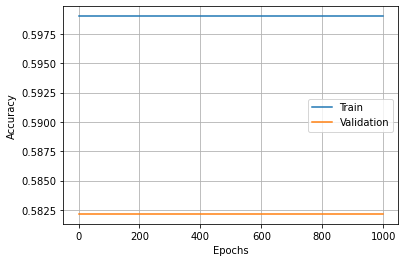

In [249]:
plt.plot(TrainingAcc)
plt.plot(ValidationAcc)
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])

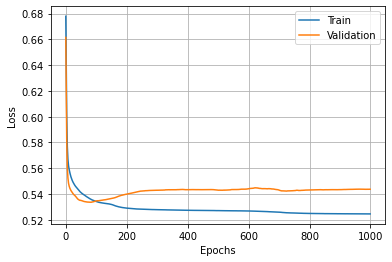

In [250]:
plt.plot(TrainingLoss)
plt.plot(ValidationLoss)
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])

In [251]:
print(classification_report(TestLabel, PredLabel))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       357
           1       0.60      1.00      0.75       526

    accuracy                           0.60       883
   macro avg       0.30      0.50      0.37       883
weighted avg       0.35      0.60      0.44       883



C:\Users\ouedr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ouedr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ouedr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(33.0, 0.5, 'Truth')

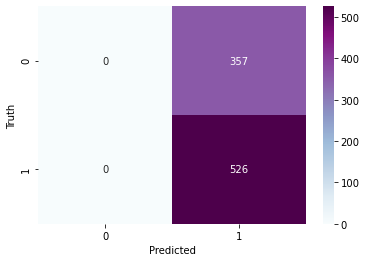

In [252]:
Conf_mat = confusion_matrix(TestLabel, PredLabel)

sn.heatmap(Conf_mat, annot=True, cmap='BuPu', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
from pytorch_tabnet.tab_model import TabNetClassifier

classifier = TabNetClassifier(verbose=0,seed=42)
classifier.fit(X_train=Train, y_train=TrainLabel,
               patience=5,max_epochs=100,
               eval_metric=['auc'])

predictions = classifier.predict_proba(Test)[:,1]

No early stopping will be performed, last training weights will be used.
